Experimenting with the Keras API and Tensorflow following this YouTube course https://www.youtube.com/watch?v=qFJeN9V1ZsI sponsored or created by https://deeplizard.com/  This is definitely a very good introduction course.

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

In [4]:
# Targets: 1 = experienced side effects, 2 = did not experience side effects
# 5% of younger people experienced side effects, 5% of older people did not experience side effects
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [5]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, input_shape=(1,), activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.7083 - accuracy: 0.4990
Epoch 2/30
210/210 - 0s - loss: 0.6757 - accuracy: 0.8386
Epoch 3/30
210/210 - 0s - loss: 0.6492 - accuracy: 0.8810
Epoch 4/30
210/210 - 0s - loss: 0.6227 - accuracy: 0.8705
Epoch 5/30
210/210 - 0s - loss: 0.5957 - accuracy: 0.8810
Epoch 6/30
210/210 - 0s - loss: 0.5675 - accuracy: 0.8986
Epoch 7/30
210/210 - 0s - loss: 0.5382 - accuracy: 0.9014
Epoch 8/30
210/210 - 0s - loss: 0.5084 - accuracy: 0.9029
Epoch 9/30
210/210 - 0s - loss: 0.4793 - accuracy: 0.9138
Epoch 10/30
210/210 - 0s - loss: 0.4521 - accuracy: 0.9090
Epoch 11/30
210/210 - 0s - loss: 0.4273 - accuracy: 0.9219
Epoch 12/30
210/210 - 0s - loss: 0.4051 - accuracy: 0.9248
Epoch 13/30
210/210 - 0s - loss: 0.3854 - accuracy: 0.9148
Epoch 14/30
210/210 - 0s - loss: 0.3685 - accuracy: 0.9243
Epoch 15/30
210/210 - 0s - loss: 0.3542 - accuracy: 0.9267
Epoch 16/30
210/210 - 0s - loss: 0.3417 - accuracy: 0.9281
Epoch 17/30
210/210 - 0s - loss: 0.3314 - accuracy: 0.9267
Epoch 

In [26]:
model.weights 

[<tf.Variable 'dense/kernel:0' shape=(1, 16) dtype=float32, numpy=
 array([[-0.04694164, -0.56716174, -0.46989352, -0.2583939 , -0.0154072 ,
          0.27282512,  0.5120504 ,  0.18836603,  0.5401668 ,  0.5170204 ,
         -0.06415027,  0.588311  , -0.14476427, -0.4193947 , -0.15595095,
          0.5465754 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.08707511, -0.14362608,  0.01429002,  0.18954526,  0.04679232,
         0.        , -0.12570624,  0.20405161,  0.        ,  0.18180096,
        -0.11939781], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(16, 32) dtype=float32, numpy=
 array([[ 1.88359588e-01, -2.26399302e-02,  5.73098660e-05,
         -8.48396719e-02, -2.33468249e-01, -2.15860903e-02,
         -2.80219465e-01, -2.86832750e-01,  2.57203251e-01,
          6.49997890e-02,  2.64583856e-01,  3.09833795e-01,
          2.10909039e-01, -3.09244484e-

In [29]:
model.to_json()  # Architecture only, could also export yml

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

This section covers creating a validation set with keras.  If the accuracy and val_accuracy don't correlate, we may have overfitting.

In [13]:
model_with_validation = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, input_shape=(1,), activation='softmax')
])
model_with_validation.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_with_validation.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6353 - accuracy: 0.5566 - val_loss: 0.6309 - val_accuracy: 0.5524
Epoch 2/30
189/189 - 0s - loss: 0.6098 - accuracy: 0.6376 - val_loss: 0.6059 - val_accuracy: 0.6524
Epoch 3/30
189/189 - 0s - loss: 0.5794 - accuracy: 0.7111 - val_loss: 0.5810 - val_accuracy: 0.6905
Epoch 4/30
189/189 - 0s - loss: 0.5515 - accuracy: 0.7476 - val_loss: 0.5578 - val_accuracy: 0.7095
Epoch 5/30
189/189 - 0s - loss: 0.5239 - accuracy: 0.7767 - val_loss: 0.5346 - val_accuracy: 0.7286
Epoch 6/30
189/189 - 0s - loss: 0.4963 - accuracy: 0.8153 - val_loss: 0.5119 - val_accuracy: 0.7714
Epoch 7/30
189/189 - 0s - loss: 0.4691 - accuracy: 0.8323 - val_loss: 0.4894 - val_accuracy: 0.7952
Epoch 8/30
189/189 - 0s - loss: 0.4428 - accuracy: 0.8545 - val_loss: 0.4684 - val_accuracy: 0.8095
Epoch 9/30
189/189 - 0s - loss: 0.4183 - accuracy: 0.8741 - val_loss: 0.4496 - val_accuracy: 0.8238
Epoch 10/30
189/189 - 0s - loss: 0.3960 - accuracy: 0.8910 - val_loss: 0.4329 - val_accuracy: 0.8429

Testing the models

In [14]:
test_labels = []
test_samples = []
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

In [15]:
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [17]:
predictions = model_with_validation.predict(x=scaled_test_samples, batch_size=10, verbose=0) # Inference

In [18]:
for i in predictions:
    print(i)

[0.5893243  0.41067576]
[0.9507733  0.04922668]
[0.95306885 0.0469312 ]
[0.42410484 0.57589513]
[0.9612331  0.03876689]
[0.7098934  0.29010656]
[0.65204024 0.34795976]
[0.01699143 0.98300856]
[0.52356386 0.4764361 ]
[0.9612888  0.03871119]
[0.05954698 0.94045305]
[0.7098934  0.29010656]
[0.22445175 0.7755483 ]
[0.03427638 0.9657237 ]
[0.9595372  0.04046283]
[0.94560933 0.05439071]
[0.96057224 0.03942782]
[0.04075573 0.95924425]
[0.9612702  0.03872975]
[0.03142089 0.9685791 ]
[0.30161068 0.69838935]
[0.02027196 0.97972804]
[0.3304355 0.6695644]
[0.933574   0.06642599]
[0.08169861 0.9183014 ]
[0.7616439 0.2383561]
[0.4569762  0.54302377]
[0.95306885 0.0469312 ]
[0.96121454 0.03878548]
[0.30161068 0.69838935]
[0.9613444  0.03865558]
[0.14509478 0.85490525]
[0.65204024 0.34795976]
[0.27427045 0.7257296 ]
[0.960673   0.03932698]
[0.03142089 0.9685791 ]
[0.8765917 0.1234083]
[0.9131867  0.08681325]
[0.9568168  0.04318317]
[0.07348592 0.926514  ]
[0.30161068 0.69838935]
[0.8266378  0.17336217

In [19]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [20]:
for i in rounded_predictions:
    print(i)

0
0
0
1
0
0
0
1
0
0
1
0
1
1
0
0
0
1
0
1
1
1
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
1
1
0
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
1
0
0
1
0
0
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
1
0
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
0
0
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
1
1
0
1
1
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
0
0
1
0
1
1
1
0
1
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
1
1
0
0
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
1
1
0
0
0
0
1
0
0
0
1
1
1
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
0
0
1
1
0
1
1
1
1
0
1
0
0
1
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
1
0


Confusion matrix to visualize prediction results

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [23]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[195  15]
 [  9 201]]


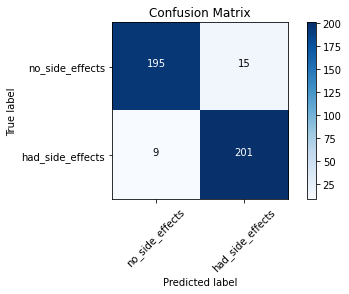

In [25]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')